# ASTR 21100 

# *"Computational Techniques in Astrophysics"*

## Instructor: Andrey Kravtsov

### office: ERC 415; email: kravtsov@uchicago.edu
### office hours: Tue, 10:30am-noon (unless noted otherwise)

### Teaching Assistants: 
### Dimitrios Tanoglidis (dtanoglidis@uchicaago.edu)
### Georgios Zakharegkas (gzakharegkas@uchicago.edu)

### Course syllabus

Available <a href="https://docs.google.com/document/d/1R_68I3HV6ItznZz1_NaZsDf_s4fpGFXoWKkIv3eneVk/edit?usp=sharing">online.</a>

### Python with NumPy 

We will heavily use <a href="https://numpy.org/"><tt>numpy</tt></a> python package. Numpy has handy routines for various tasks such as reading formatted files, and array initialization.

The main reason for its heavy use in computations with python is that python, being an interpreted language, is quite slow, especially in computations involving loops with large iteration counts. 

Numpy provides relatively fast routines to perform commonly encountered operations applied to all elements of arrays at once, thereby avoiding costly loops. 

#### Consider computing distance to an object of a given brightness in expanding universe. 

In 1929, Edwin Hubble (UChicago alum and a college <a href="https://en.wikipedia.org/wiki/1909%E2%80%9310_Chicago_Maroons_men%27s_basketball_team">basketball star player</a> and coach) showed that our Universe is expanding by demonstrating that that there is a correlation between distance and recession velocity of galaxies, $v=cz$ (where $c$ is speed of light), as measured by its spectral line shift relative to its wavelenght in the lab frame, $z=\Delta (\lambda_{\rm obs}-\lambda_{\rm lab})/\lambda_{\rm lab}$:

$$ cz \propto d = H_0\, d,$$

where $H_0$ is now called *the Hubble constant*. 

<center>
<img width=900 src="img/uchicago_basketball_team_09_10.jpg"></img>
</center>

In 1929, Edwin Hubble showed that our Universe is expanding by demonstrating that that there is a correlation between distance and recession velocity of galaxies.
<p></p>
<center><img  width=900 src="img/hubble29_v_d_fig.png"></img></center>

Almost all galaxy spectral shifts are to the red, so the widespread term for these is *redshift.* 

Given that distnces to galaxies are usually measured in the units natural for this purpose - million parsecs or Megaparsec (Mpc for short) and $cz$ has units of velocity, which is usually measured for galaxies in $\rm km/s$, $H_0$ is usually quoted in units of $\rm km/s/Mpc$. 

A modern version of the Hubble diagram (from <a href="https://ui.adsabs.harvard.edu/abs/2019ApJ...882...34F/abstract">Freedman et al. 2019</a>). TRGB is short for "tip of the red giant branch", which refers to a <a href="https://en.wikipedia.org/wiki/Tip_of_the_red-giant_branch">particular way of measuring distances.</a> 

<br>
<center><img width=1000 src="img/freedman_etal19_hubble_diagram.png"></img></center>

###  What is distance modulus? 

#### Fluxes in astronomy are measured using *magnitudes* 

Flux of an object (radiation energy per unit time per unit area of detector) of intrinsic luminosity $L$ (emitting a given amount of radiation energy per unit time) at a distance $d_L$ is computed as $f=L/(4\pi d_L^2)$. 

For historical reasons, astronomers measure fluxes, not as $f$ but in *magnitudes* that depend on $f$ logarithmically: 

$$m = -2.5\log_{10} f +{\rm const},$$ 

where $\rm const$ is a constant that defines *magnitude system.* 

If we plug in expression for $f$ into this equation we get: 

$$m= -2.5\log_{10} L + 5\log_{10} d_L + \log_{10}4\pi + {\rm const} = -2.5\log_{10} L + 5\log_{10} 10\ {\rm pc} - 5\log_{10} 10\ {\rm pc} + {\rm const} + 5\log_{10} d_L = M + 5\log_{10}\frac{d_L}{10\,\rm pc}, $$

where $M$ is the absolute magnitude, defined as the *apparent magnitude* that the object would have for an observed on Earth, if it was located at a distance of $10$ parsecs. 

### The distance modulus 

is a quantity defined as 

$$\mu = m-M = 5\log_{10}\frac{d_L}{10^{-5}\,\rm Mpc} = 5\log_{10} d_L + 25,$$

where $d_L$ is assumed to be in units of Megaparsecs (Mpc). 

#### Supernovae type Ia are the best distance indicators for very large distances

In this image a supernova at $z\approx 1.9$ was <a href="https://www.universetoday.com/101240/hubble-telescope-breaks-record-for-finding-most-distant-supernova/">detected</a> by <a href="https://www.nasa.gov/mission_pages/hubble/story/index.html">the Hubble Space Telescope.</a>

<br>
<center><img width=700 src="img/hst_sn1306d_full.jpg"></img></center>

It turns out that this “Hubble law” is just the local manifestation of a more complicated, nonlinear relation between distance and redshift. 


A modern version of the Hubble diagram (from <a href="https://ui.adsabs.harvard.edu/abs/2012ApJ...746...85S/abstract">Suzuki et al. 2012</a>) for <a href="https://en.wikipedia.org/wiki/Type_Ia_supernova">type Ia supernovae</a>.

<br>
<center><img width=1000 src="img/suzuki_etal12_hubble_diagram.png"></img></center>

### Was Hubble wrong? 

Think Taylor expansion of the distance (or distance modulus): linear term is simply the first two terms of the expansion. 

Consider Taylor expansion of $f(x)$ arond $x_0$:
$$f(x) = \sum\limits^\infty_{n=0} \frac{f^{(n)}(x_0)(x-x_0)^n}{n!}=f(x_0)+f^\prime(x_0)\,(x-x_0)+\frac{1}{2}f^{\prime\prime}(x_0)\,(x-x_0)^2 + \frac{1}{6}f^{(3)}(x_0)\,(x-x_0)^3+ \mathcal{O}[(x-x_0)^4].$$

The term $\mathcal{O}[(x-x_0)^4]$ is the standard shorthand for ``and terms of order 4 and higher''. If we neglect terms above certain order, we are no longer guaranteed to represent $f(x)$ exactly.

For example, to linear order: 
$$f(x) \approx f(x_0)+f^\prime(x_0)\,(x-x_0).$$

The difference between $f(x)$ and approximation using limited number of terms, such as $f(x_0)+f^\prime(x_0)\,(x-x_0)$, is called *truncation error*. 

In [2]:
import numpy as np
from math import factorial 

def exp_Taylor(x0, N, x):
    """
    Taylor expansion up to order N for exp(x)
    """
    dummy = np.zeros_like(x)
    for n in range(N+1):
        dummy += np.exp(x0)*(x-x0)**n/factorial(n)
    return dummy


In [1]:
import matplotlib.pyplot as plt

In [6]:
def plot_pretty(dpi=175,fontsize=9):
    # import pyplot and set some parameters to make plots prettier
    plt.rc("savefig", dpi=dpi)
    plt.rc("figure", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in') 
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1])

    return

plot_pretty(dpi=250, fontsize=9)

### LaTeX

Although not strictly required, I highly recommend installing <a href="https://www.latex-project.org/get/">a LaTeX distribution</a> on your laptop. I use LaTeX commands to format plot labels in matplotlib. 

In [4]:
plt.rc('text', usetex=True)


In [7]:
plot_pretty(dpi=150, fontsize=12)

In [8]:

def taylor_exp_illustration(figsize=3.0):
    N = 4; x0 = 1.0

    plt.figure(figsize=(figsize,figsize))
    #plt.title('Taylor expansion of $e^x$ at $x_0=%.1f$'%x0, fontsize=9)
    plt.xlabel('$x$'); plt.ylabel(r'$e^x, f_{\rm Taylor}(x)$')

    xmin = x0 - 1.0; xmax = x0 + 1.0
    x = np.linspace(xmin, xmax, 100)
    plt.xlim([xmin,xmax]); plt.ylim(0.,8.)

    exptrue = np.exp(x)
    plt.plot(x, exptrue, linewidth=1.5, c='m', label='$e^x$')
    colors = ['darkslateblue', 'mediumslateblue', 'slateblue', 'lavender']
    lstyles = [':','--','-.','-','-.']
    for n in range(N):
        expT = exp_Taylor(x0, n, x)
        plt.plot(x, expT, linewidth=1.5, c=colors[n], ls=lstyles[n], label='%d order'%n)

    plt.legend(loc='upper left', frameon=False, fontsize=7)
    plt.show()


Consider expansion of $f(x) = e^x$ around $x_0=1$. Plot below shows $e^x$ itself and the first 4 terms of the Taylor expansion.  

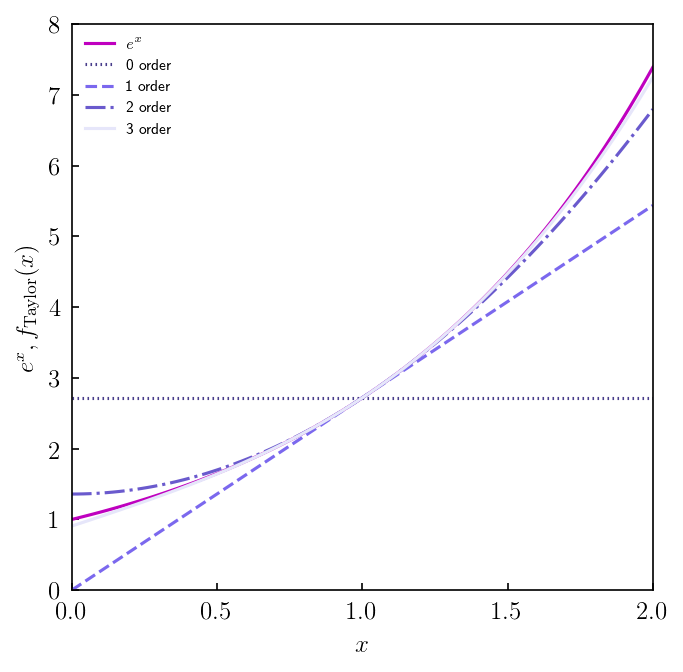

In [10]:
taylor_exp_illustration(figsize=5.0)

### Distances in expanding universe

Cosmological models, constructed using solutions of the Einstein’s equations of General Relativity predict that relation depends on the matter and energy mass density of the universe - i.e., everything that gravitates and that enters in the right hand side of the Einstein's equations. These mass densities are usually expressed in *dimensionless units* - i.e., normalized to a characteristic *critical density*, $\rho_{\rm crit}$. So for example, the mean mass density of matter in the universe around us is expressed as $\Omega_{\rm m0} = \rho_{\rm m0}/\rho_{\rm crit}$.    

<center>
<img width=700 src="img/gr_equation.jpg"></img>
<img width=500 src="img/einstein_chalkboard.jpg"></img>
</center>

#### *"Cosmology: a search for two numbers."* - <a href="https://physicstoday.scitation.org/doi/10.1063/1.3021960">Allan Sandage (1970)</a> 

Cosmological models, in which universe contains only matter derived from the solutions of the Einstein’s equations of GR predict that relation is given by the following formula (<a href="https://ui.adsabs.harvard.edu/abs/1977AmJPh..45..869T">Terrell 1977</a>):

$$d_L = \frac{c}{H_0}\, z\left[1 + \frac{(1-q_0)z}{1+q_0z+\sqrt{1+2q_0z}}\right],$$

where $q_0=\Omega_{m0}/2$ is the *deceleration parameter*. The two numbers in the quote above are $H_0$ and $q_0$. 

Pause to think how long would it take you to compute $d_L$ on a piece of paper without computer or calculator. While you are at it, think about how would you compute square root with a pen and paper.  

 Subscript $L$ in $d_L$ indicates that this is the *luminosity distance* - i.e., the distance to be used to compute flux of an object of a given intrinsic luminosity $L$. This is needed because in expanding universe, different (although related) distance definitions are used in different situations. 

In [55]:
import numpy as np 

clight = 2.99792458e5 # c in km/s

def d_L_simple(z, H0, Om0):
    q0 = 0.5 * Om0
    q0z = q0 * z
    return clight * z/H0 * (1. + (z-q0z) / (1. + q0z + np.sqrt(1. + 2.*q0z)))  

In [57]:
Om0 = 0.3; H0 = 70. # H0 in km/s/Mpc

z = np.array([0.1, 1.0, 2.0])
print(d_L_simple(z, H0, Om0))


[  446.20861376  5872.29444101 14242.63441846]


The cool thing is that we can now recompute it for a very large number of different parameters with almost no additional coding effort. 

In [58]:
#define evenly spaced grid of z values using a numpy function
z = np.linspace(0., 10., 1000)

# compute distances for all redshifts z in one call
dL = d_L_simple(z, H0, Om0)

In [60]:
print(np.size(dL), np.min(dL), np.mean(dL))

1000 0.0 52882.44799127826


### Matplotlib

Matplotlib is a package for (mostly) 2D plots built upon the Numpy and Scipy libraries. It was conceived by <a href="https://en.wikipedia.org/wiki/John_D._Hunter">John Hunter</a> at U.Chicago in 2002, developed by him and others over the subsequent decade into a full-fledged library. 


In [33]:
# import matplotlib
import matplotlib.pyplot as plt
# use jupyter "magic" command to tell it to embed plot into the notebook 
%matplotlib inline

def plot_line(x, y, figsize=6, xlabel=' ', ylabel=' ', col= 'darkslateblue', legend=None, figsave = None):
    plt.figure(figsize=(figsize,figsize))
    plt.xlabel(xlabel); plt.ylabel(ylabel)
    
    if legend:
        plt.plot(x, y, lw = 1., c=col, label = legend)
        plt.legend(frameon=False, loc='lower left')
    else:
        plt.plot(x, y, lw = 1., c=col)

    if figsave:
        plt.savefig(figsave, bbox_inches='tight')

    plt.show()
    

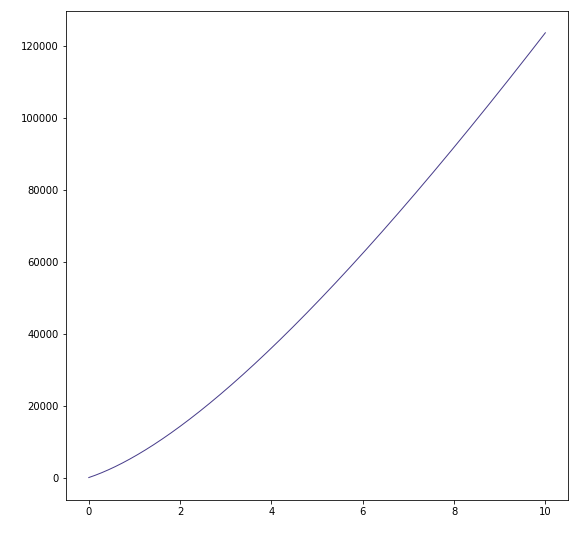

In [61]:
plot_line(z, dL, figsize=9)

### Distances in general cosmological models

$$d_c =\int\limits_0^z \frac{dz}{E(z)}.$$

where $\Omega_k = 1-\Omega_{\rm m0} - \Omega_\Lambda$ and $E(z)=\sqrt{\Omega_{\rm m0}(1+z)^3+\Omega_k(1+z)^2+\Omega_\Lambda}.$

$$
d_L(z,\Omega_0,\Omega_\Lambda) = \frac{c}{H_0}\,(1+z)\,\left\{
\begin{array}{ll}
\frac{1}{\sqrt{\Omega_k}}\,\sinh\left[\sqrt{\Omega_k}\,d_{\rm c}\right] & {\rm for}~\Omega_k>0 \\
d_{\rm c} & {\rm for}~\Omega_k=0 \\
\frac{1}{\sqrt{|\Omega_k|}}\,\sin\left[\sqrt{|\Omega_k|}\,d_{\rm c}\right] & {\rm for}~\Omega_k<0
\end{array}
\right.
$$


<a href="https://www.astropy.org/">Astropy</a> package has a <a href="https://docs.astropy.org/en/stable/_modules/astropy/cosmology/core.html#FLRW">cosmology routines</a>, on which computes $d_L$ for input cosmological parameters.

In [42]:
from astropy.cosmology import LambdaCDM
import astropy.units as u

def d_L_astropy(z, H0, Om0, OmL):
    cosmo = LambdaCDM(H0=H0, Om0=Om0, Ode0=OmL)
    return cosmo.luminosity_distance(z=z) / u.Mpc

In [43]:
# check
Om0 = 0.3; OmL = 0.0; H0 = 70.; z = 1.0 

print(d_L_astropy(z,H0,Om0,OmL), d_L_simple(z,H0,Om0))

5872.294441005939 5872.294441005937


In [44]:
nz = 1000
z = np.linspace(0.,10.,nz)

Om0 = 0.3; OmL = 0.7; H0 = 70.

%timeit dummy = d_L_astropy(z,H0,Om0,OmL)

438 µs ± 23.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


however, if you try to understand what numerical integration method astropy uses or with what accuracy it computes the distance, you would have trouble finding this basic information without spending some time and digging into astropy <a href="https://github.com/astropy/astropy/tree/master/astropy">source code.</a> Even this will not give you an idea of what method it uses, you will only find references to a QUADPACK library. 

What if we want to check astropy result? We could find routine from another library, such as <a href="http://www.benediktdiemer.com/code/colossus/">Colossus</a>, or construct our own routine using one of the SciPy's integration routines. We can also write our own numerical integration routine because 1) it is not that difficult, and 2) we can customize/tailor our routine and its inputs and outputs for our specific needs. 

### What is integration?

Numerical integration of a function, $f(x,\ldots)$ over a single variable, $x$ (1d integration) over interval $[a,b]$:

$$\int\limits_a^b f(x) dx,$$

is evaluation of the area under $f(x)$, in which regions of $f(x)<0$ contribute negative areas and regions of $f(x)>0$ contribute positive areas. For example, $\int_0^{2\pi}\cos x\,dx = 0$. 

If an integral has "analytic expression" or, as is often said, "can be expressed in closed form," we can simply use such expression to evaluate it. 

For example, $\int \sin x\,dx = -\cos x + {\rm const}$, and so 

$$\int\limits_0^{\pi}\sin x\,dx = -\cos\pi +\cos 0 = 1 + 1 =2.$$ 

We can explore integration routines in the <a href="https://docs.scipy.org/doc/scipy/reference/integrate.html">scipy.integrate</a> library.

In [67]:
# check using numerical integration
from scipy.integrate import romberg

print(romberg(np.sin, 0., 2.*np.pi))

2.5648942582957195e-16


### How can we evaluate integrals numerically?

The simplest method - "trapezoidal integration." Can be used to get reasonably accurate numerical integral estimate and easiest to remember. 

Specifically, to evaluate integral of $f(x)$ (area under $f(x)$ for $x\in[a,b]$):

Split the integration interval into $N$ equal-size sub-intervals of size $h=(b-a)/N=x_{i+1}-x_i$. For convenience, let's denote $f_i = f(x_i)$, $f_{i+1}=f(x_{i+1})$, etc.

Approximate area under $f(x)$ in each interval, $A_i$, can then be approximated by the area of the trapezoid formed by vertices $(x_i, 0)$, $(x_{i+1},0)$, $(x_i, f_i)$, $(x_{i+1}, f_{i+1})$, $T_i$:

$$T_i = \frac{1}{2}(f_i + f_{i+1})\, h.$$

The total area under $f(x)$ in the interval $[a,b]$ is then:

$$A = \int\limits_a^b f(x)\, dx  \sum\limits_0^{N-1} A_i \approx \sum\limits_0^{N-1} T_i \frac{h}{2}\sum\limits_0^{N-1}(f_i + f_{i+1}),$$

which can be recast as

$$A \approx \frac{h}{2}(f_0 + f_{N-1}) + h\sum\limits_1^{N-2}(f_i),$$

Given that $h=(b-a)/N$, this expression can be thought of as $A\approx \bar{f} (b-a)$, where $\bar{f}$ is the mean value of $f(x)$ over $[a,b]$. I.e., we are approximating the area under the curve by the area of rectangle of width $(b-a)$ and height equal to $\bar{f}$. 

In [26]:
import numpy as np

def trapzd(func, a, b, Np):
    """
    function implementing trapezoidal integration scheme using
    numpy vector operations
    
    Parameters
    -----------------------------------------------------------
    func: python function object
          function to integrate, must take numpy arrays as input
    a, b: floats
          limits of the integral
    Np  : number of intervals to use in integration
    
    Returns
    -------------------------------------------------------------
    value of the estimated int^b_a f(x)dx
    """
    
    hd = (b-a)/Np; xd = a + np.arange(Np)*hd
    return (0.5*(func(a) + func(b)) + np.sum(func(xd[1:]))) * hd


### Making "publication quality" plots

What is publication quality? To get an idea we can look at a typical astronomical publication.

Matplotlib allows for very detailed customization of plots. It may be tricky to find customization you want, but options in the routine below allow to control the main features of the plot. 

In [26]:
def plot_pretty(dpi=175,fontsize=9):
    # set some parameters to make plots prettier
    plt.rc("savefig", dpi=dpi)
    plt.rc("figure", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in') 
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1])

    return

plot_pretty(dpi=250, fontsize=12)

### LaTeX

Although not strictly required, I highly recommend installing <a href="https://www.latex-project.org/get/">a LaTeX distribution</a> on your laptop (see <a href="https://matplotlib.org/3.1.1/tutorials/text/usetex.html">here</a> for information for how to use LaTeX with matplotlib. I use LaTeX commands to format plot labels in matplotlib and we can use LaTeX fonts for axis labels. 

In [22]:
# option to use LaTeX with matplotlib
plt.rc('text', usetex=True)


C:\Users\h2_sf\Anaconda3\lib\site-packages\astropy\units\quantity.py:461: RuntimeWarning: divide by zero encountered in log10
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


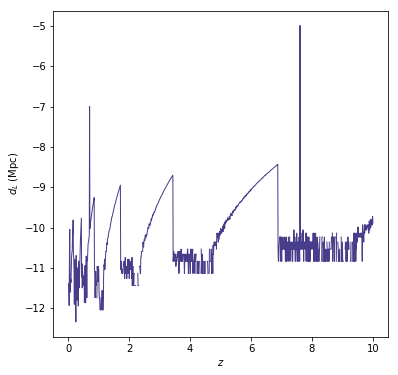

In [46]:
dummy = d_L_astropy(z,H0,Om0,OmL)

plot_line(z, np.log10(np.abs(dL-dummy)), xlabel=r'$z$', ylabel=r'$d_L\ \rm (Mpc)$', figsize=6)

Is this plot publication quality?

## By the end of the first week. 

* Install full Anaconda Python 3.7 distribution following <a href="http://docs.anaconda.com/anaconda/install/">installation instructions</a> for your OS on your laptop. 

* download the Jupyter notebook with these notes from the <a href="">course GitHub repository</a> (notebook 01_*.ipynb)

* Run Jupyter notebook server <tt>jupyter notebook</tt> and access the l01_approximation.ipynb notebook. Make sure you can run it.  

* Get account on <a href="http://slack.com">Slack</a>, if you don't have one, and email me your user name to be added for access to <a href="https://a211w20.slack.com">Slack workspace</a> for this course.
